# Problem Statement: 

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1.)Check eligibility of the Customer given the inputs described above.(Classification)
2.)Identify customer segments from given data and categorize customer into one of the segments.(Clustering)
3.)If customer is not eligible for the input required amount and duration:
a.)what can be amount for the given duration.(Regression)
b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

# Check eligibility of the Customer given the inputs described above.(Classification)

Read Dataset

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [6]:
from os import chdir
os.chdir("F:/Etlhive/LoanPredictionProjectFinal/")

In [7]:
import pandas as pd
A = pd.read_csv("training_set.csv")

In [8]:
A.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


Missing Data treatment

In [9]:
from PM8wdnew import replacer
replacer(A)

Define X and Y

In [10]:
Y = A[["Loan_Status"]]
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)

EDA

Ycat,Xcon --> ANOVA
Ycat,Xcat --> chisquare

Divide data in con and cat

In [11]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [14]:
from PM8wdnew import ANOVA,chisq

for i in con:
    print("--------","Loan_Status vs",i,"-------")
    print(ANOVA(A,"Loan_Status",i))

-------- Loan_Status vs ApplicantIncome -------
0.90252
-------- Loan_Status vs CoapplicantIncome -------
0.14239
-------- Loan_Status vs LoanAmount -------
0.36769
-------- Loan_Status vs Loan_Amount_Term -------
0.60396
-------- Loan_Status vs Credit_History -------
0.0


In [15]:
chisq

<function PM8wdnew.chisq(df, cat1, cat2)>

In [17]:
for i in cat:
    print("--------","Loan_Status vs",i,"-------")
    print(chisq(A,"Loan_Status",i))

-------- Loan_Status vs Gender -------
0.73915
-------- Loan_Status vs Married -------
0.02961
-------- Loan_Status vs Dependents -------
0.36887
-------- Loan_Status vs Education -------
0.0431
-------- Loan_Status vs Self_Employed -------
1.0
-------- Loan_Status vs Property_Area -------
0.00214


Outliers

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [19]:
ss.fit(X[con])

StandardScaler()

In [20]:
X1 = pd.DataFrame(ss.transform(X[con]),columns=con)

In [21]:
X1.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072651,-0.554368,0.000000,0.279851,0.45164
1,0.000000,-0.038610,-0.219273,0.279851,0.45164


In [22]:
from PM8wdnew import outliers
OL = outliers(X1)

In [23]:
OL

[9,
 14,
 68,
 94,
 126,
 130,
 133,
 155,
 171,
 177,
 183,
 185,
 242,
 262,
 278,
 308,
 313,
 333,
 369,
 402,
 409,
 417,
 432,
 443,
 487,
 495,
 497,
 506,
 523,
 525,
 546,
 561,
 575,
 581,
 585,
 600,
 604]

In [24]:
X = X.drop(index=OL,axis=0)
Y = Y.drop(index=OL,axis=0)

In [25]:
X.index = range(0,X.shape[0])
Y.index = range(0,Y.shape[0])

Preprocessing

In [26]:
from PM8wdnew import preprocessing
Xnew = preprocessing(X)

In [27]:
Xnew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.398479,-0.860843,0.184585,0.239408,0.456461,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.248823,0.053073,-0.143355,0.239408,0.456461,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.562989,-0.860843,-1.247642,0.239408,0.456461,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.703717,0.568211,-0.285844,0.239408,0.456461,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.449438,-0.860843,0.088189,0.239408,0.456461,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-0.596737,-0.860843,-1.158587,0.239408,0.456461,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
573,-0.189741,-0.860843,-1.710730,-3.237229,0.456461,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
574,1.148688,-0.715392,2.083030,0.239408,0.456461,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
575,0.983662,-0.860843,0.907499,0.239408,0.456461,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [29]:
tr_acc

0.8134490238611713

In [30]:
ts_acc

0.8362068965517241

In [31]:
Xnew.shape

(577, 20)

Tree model

In [32]:
X = X[["Credit_History","CoapplicantIncome","Property_Area","Education","Married"]]

In [33]:
Xnew = preprocessing(X)

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [35]:
Xnew.shape

(577, 9)

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [37]:
tr_acc

0.8134490238611713

In [38]:
ts_acc

0.8362068965517241

In [39]:
from sklearn.ensemble import RandomForestClassifier
dtc = RandomForestClassifier(criterion="entropy",random_state=21,max_depth=3)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [40]:
tr_acc

0.8134490238611713

In [41]:
ts_acc

0.8448275862068966

Gridsearch CV

In [42]:
tuning_grid = {"max_depth":range(2,5,1),"criterion":["entropy"],"n_estimators":range(20,30,1)}

In [43]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
cv = GridSearchCV(rfc,tuning_grid,scoring="accuracy",cv=4)

cvmodel = cv.fit(xtrain,ytrain)

In [44]:
cvmodel.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 20}

In [49]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators= 20,random_state=21)

In [50]:
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [51]:
tr_acc

0.8112798264642083

In [52]:
ts_acc

0.8448275862068966

Getting Data ready for predictions

In [53]:
B = pd.read_csv("testing_set.csv")

In [54]:
B1 = B[X.columns].head()

Missing Data treatment

In [55]:
B1.isna().sum()

Credit_History       1
CoapplicantIncome    0
Property_Area        0
Education            0
Married              0
dtype: int64

In [56]:
replacer(B)

In [57]:
cat = []
con = []
for i in B.columns:
    if(B[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [58]:
B1 = pd.DataFrame(ss.transform(B[con]),columns=con)
B2 = pd.get_dummies(B[cat])
Bnew = B1.join(B2)

In [59]:
ready_for_pred = Bnew[Xnew.columns]

In [60]:
predicted_final = model.predict(ready_for_pred)


In [61]:
predicted_final

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [62]:
E = pd.DataFrame([B.Loan_ID,predicted_final]).T
E.columns = ["Loan_ID","Loan_Status"]

In [63]:
E.to_csv("submission.csv")

In [64]:
E.head(3)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y


# Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

In [105]:
A = pd.read_csv("training_set.csv")

In [106]:
from PM8wdnew import replacer
replacer(A)

In [107]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y


In [108]:
X = A[['LoanAmount','ApplicantIncome']]

In [110]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
from PM8wdnew import outliers
ol = outliers(Xnew)
Xnew = Xnew.drop(index=ol,axis=0)
Xnew.index = range(0,Xnew.shape[0])

X = X.drop(index=ol,axis=0)
X.index = range(0,X.shape[0])

In [111]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=3)
model = agc.fit(Xnew)
Xnew['Cluster']=model.labels_

Text(0, 0.5, 'Income')

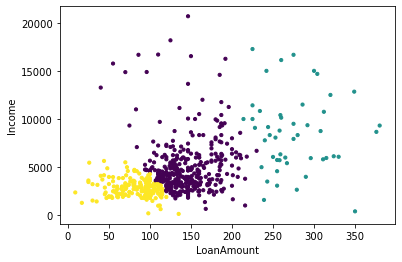

In [112]:
import matplotlib.pyplot as plt
plt.scatter(X.LoanAmount,X.ApplicantIncome,s=10,c=model.labels_)
plt.xlabel("LoanAmount")
plt.ylabel("Income")

# If customer is not eligible for the input required amount and duration:
# a.)what can be amount for the given duration.(Regression)

In [65]:
B['Loan_Status']=predicted_final

In [66]:
B.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Find out people for whom loan was rejected(testing set)

In [68]:
xtest = B[B.Loan_Status == "N"]
xtest_1 = xtest.drop(labels=['Loan_ID','LoanAmount','Loan_Status'],axis=1)

In [69]:
xtest_1.index = range(0,xtest_1.shape[0])

Create training data based on above predictors

In [73]:
Q = A[xtest_1.columns]
Q['LS'] = A.Loan_Status

In [74]:
Q = Q[Q.LS == "Y"]
Q = Q.drop(labels=["LS"],axis=1)

In [75]:
R = A[["LoanAmount"]]
R = R.iloc[Q.index,:]
R.index = range(0,R.shape[0])

In [76]:
Q.shape[0]

422

In [77]:
Q.index = range(0,Q.shape[0])

Preprocessing

In [78]:
replacer(Q)
replacer(xtest_1)

In [80]:
from PM8wdnew import preprocessing
xtrain = preprocessing(Q)
xtest_final = preprocessing(xtest_1)

In [81]:
ytrain = R.LoanAmount

In [82]:
ytrain.head(3)

0    146.412162
1     66.000000
2    120.000000
Name: LoanAmount, dtype: float64

# Regression model

In [83]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest_final)

In [84]:
pred.shape

(59,)

In [85]:
act = B[B.Loan_Status == "N"][["LoanAmount"]]

In [86]:
act.index = range(0,59)

In [87]:
E = range(0,59)

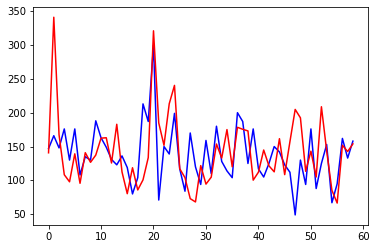

In [88]:
import matplotlib.pyplot as plt
plt.plot(act,c="blue")
plt.plot(pred,c="red")

In [89]:
pred

array([140.76282884, 340.98887023, 167.44009611, 108.34716488,
        97.92989025, 139.21375108,  95.72410567, 140.91979522,
       126.69845822, 137.37645312, 162.3882514 , 162.96968459,
       125.70134756, 182.87814716, 112.50349217,  80.3519515 ,
       118.676172  ,  85.87091315, 100.7479767 , 133.6684905 ,
       320.96099213, 184.88676045, 151.84864623, 213.26225442,
       240.32081636, 117.2343788 , 104.03410412,  73.01468012,
        68.16287152, 121.82167629,  94.52236613, 104.73290799,
       153.72808893, 133.0056771 , 175.04357448, 120.12395518,
       178.42122479, 175.51193393, 173.08154086, 100.36649536,
       112.16208568, 144.86167816, 121.51234457, 112.65882731,
       161.59599456, 108.50934213, 157.27788765, 204.81961608,
       192.41989475, 113.4063788 , 143.12129572, 105.01449359,
       208.77720141, 143.72001335,  85.34117815,  66.50746875,
       151.82643905, 142.63575017, 153.91191277])

# If duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [90]:
B['Duration']=B.Loan_Amount_Term/12

In [91]:
data_for_pred = B[(B.Duration<=20)&(B.Loan_Status=="Y")]
data_for_pred_final = data_for_pred.drop(labels=['Duration','Loan_ID','Loan_Status',"Loan_Amount_Term"],axis=1)
data_for_pred_final.index = range(0,data_for_pred_final.shape[0])

In [92]:
data_for_pred_final.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,Yes,2,Graduate,No,13633,0,280.0,1.000000,Urban
1,Male,No,3+,Graduate,No,4166,0,40.0,0.825444,Urban


# Prepare training data

In [93]:
T = A[A.Loan_Status == "Y"]
T1 = T[data_for_pred_final.columns]
T1.index = range(0,T1.shape[0])

In [94]:
xtrain = preprocessing(T1)

In [95]:
ytrain = T[["Loan_Amount_Term"]]

In [96]:
ytrain.index = range(0,ytrain.shape[0])

In [97]:
replacer(data_for_pred_final)
final_pred = preprocessing(data_for_pred_final)

In [98]:
model = lm.fit(xtrain,ytrain)
pred = model.predict(final_pred)

In [99]:
pred/12

array([[26.70187152],
       [25.32085537],
       [30.94997979],
       [27.60077863],
       [29.36765738],
       [27.31775767],
       [26.00761153],
       [29.35266256],
       [27.98882917],
       [27.67945903],
       [27.93876743],
       [27.62333266],
       [28.45878493],
       [28.32007401],
       [28.45088243],
       [28.50748258],
       [27.59835469],
       [29.41237775],
       [29.17257376],
       [28.60087152],
       [29.19650438],
       [30.1770901 ],
       [29.35780424],
       [29.27526929],
       [26.91120935],
       [28.43145448],
       [29.60026643],
       [27.5214966 ],
       [27.58142253]])

In [100]:
U = B[(B.Duration<=20)&(B.Loan_Status=="Y")][["Loan_Amount_Term"]]
U.index = range(0,U.shape[0])

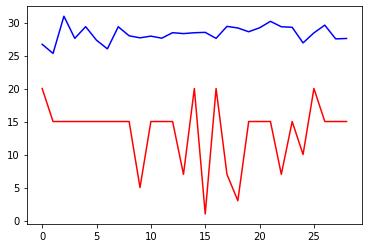

In [101]:
plt.plot(U/12,c="red")
plt.plot(pred/12,c="blue")

In [102]:
U.shape

(29, 1)

In [103]:
pred.shape

(29, 1)

In [104]:
U

,Loan_Amount_Term
0,240.0
1,180.0
2,180.0
3,180.0
4,180.0
5,180.0
6,180.0
7,180.0
8,180.0
9,60.0
